Enter the SMILES string of the molecule:  CCO


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

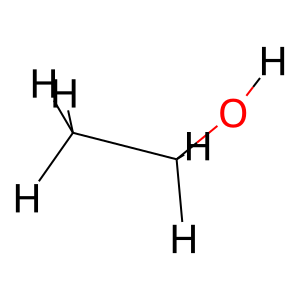

,Property,Value
0,Molecular Weight,46.069
1,Number of Atoms,9
2,Number of Bonds,8
3,Molecular Formula,C2H6O
4,IUPAC Name,ethanol
5,Exact Mass,46.0419
6,Monoisotopic Mass,46.0419


In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
import py3Dmol
from IPython.display import display

def validate_smiles(smiles):
    # Check if the input is a valid SMILES string
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

def get_molecular_formula(mol):
    # Calculate molecular formula
    return Chem.rdMolDescriptors.CalcMolFormula(mol)

def process_smiles(smiles, df_dataset):
    # Create a molecule from the SMILES string
    mol = Chem.MolFromSmiles(smiles)

    if mol is None:
        raise ValueError("Invalid SMILES string")

    # Add explicit hydrogen atoms
    mol = Chem.AddHs(mol)

    # Calculate molecular weight
    mw = Descriptors.MolWt(mol)

    # Display additional molecular descriptors
    num_atoms = mol.GetNumAtoms()
    num_bonds = mol.GetNumBonds()

    # Embed the molecule to generate conformers
    AllChem.EmbedMolecule(mol)

    # Generate XYZ block after embedding
    mol_xyz = Chem.MolToXYZBlock(mol)
    p = py3Dmol.view(width=400, height=400)
    p.addModel(mol_xyz, 'xyz')
    p.setStyle({'stick': {}})
    p.setBackgroundColor('white')
    p.zoomTo()
    p.show()

    # Generate 2D representation and display in Jupyter Lab
    mol_img = Draw.MolToImage(mol)
    display(mol_img)

    # Get molecular formula
    molecular_formula = get_molecular_formula(mol)

    # Extract additional information from dataset based on canonical SMILES
    row = df_dataset.loc[df_dataset['canonicalsmiles'] == smiles].iloc[0]
    iupac_name = row['iupacname']
    exact_mass = row['exactmass']
    monoisotopic_mass = row['monoisotopicmass']

    # Create DataFrame for table
    data = {
        'Property': ['Molecular Weight', 'Number of Atoms', 'Number of Bonds', 'Molecular Formula',
                     'IUPAC Name', 'Exact Mass', 'Monoisotopic Mass'],
        'Value': [mw, num_atoms, num_bonds, molecular_formula,
                  iupac_name, exact_mass, monoisotopic_mass]
    }

    df = pd.DataFrame(data)

    # Display table
    display(df)

def main():
    # Prompt the user to enter a SMILES string
    smiles = input("Enter the SMILES string of the molecule: ")

    # Validate the SMILES input
    if validate_smiles(smiles):
        # Load the dataset
        dataset_path = '/Users/anastasiafloris/Downloads/PubChem_compound_list_ntk7AD1LWPdv3VrE2LwT7BjpSok_XaQB3iS_TcU1rUzFLJE.csv'  # Replace with the actual path to your dataset
        df_dataset = pd.read_csv(dataset_path)

        # Process the SMILES string
        process_smiles(smiles, df_dataset)
    else:
        print("Invalid SMILES string")

if __name__ == "__main__":
    main()
